# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/kpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


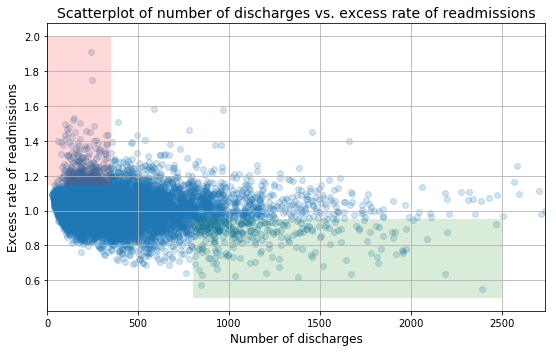

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I agree with the initial observations.
I'm not sure I agree with the statitics, so I will show my work.

In [7]:
df = clean_hospital_read_df 
less_100=df[df['Number of Discharges']<100]
np.mean(less_100['Excess Readmission Ratio'])

1.0226183501683506

In [22]:
less_100[less_100['Excess Readmission Ratio']>1].count()
high_ratio_100 = 751
less_100.count()
less_100_hospitals = 1269
high_ratio_100/less_100_hospitals

0.5918045705279747

In [23]:
more_1000=df[df['Number of Discharges']>1000]
np.mean(more_1000['Excess Readmission Ratio'])

0.9783354211663071

In [24]:
more_1000[more_1000['Excess Readmission Ratio']>1].count()
high_ratio_1000=206
more_1000.count()
more_1000_hospitals=463
high_ratio_1000/more_1000_hospitals

0.4449244060475162

These are the findings listed above:
- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

However, when calculating the mean rates, I'm finding:
- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 59% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

Conclusion:

I'm not sure if there is a significant coorelation between hospital capacity (number of discharges) and readmission rates.

Regulatory policy recommendations:

Since we are not sure there is a signifcant coorelation, we should investigate further before setting up requirements and distinguishing patient treatment between small versus large hospitals/facilities.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- Setup an appropriate hypothesis test.
- Compute and report the observed significance value (or p-value).
- Report statistical significance for  α = .01.
- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

H0: $\mu$1 = $\mu$2

HA: $\mu$1 > $\mu$2

$\alpha$ = 0.01

where $\mu$1 = readmission rates of hospitals  < 300 discharges and $\mu$2 = readmission rates of hospitals > 300 or more discharges

"The null hypothesis is rejected if the p-value is less than a predetermined level, α. α is called the significance level, and is the probability of rejecting the null hypothesis given that it is true (a type I error). It is usually set at or below 5%." https://en.wikipedia.org/wiki/Statistical_significance

In [25]:
less_300 = df[df['Number of Discharges']<300]
mean_less_300 = np.mean(less_300['Excess Readmission Ratio'])
mean_less_300

1.0142382121807445

In [26]:
more_300 = df[df['Number of Discharges']>=300]
mean_more_300 = np.mean(more_300['Excess Readmission Ratio'])
mean_more_300

0.9998708480237513

In [27]:
samp_diff = mean_less_300 - mean_more_300
samp_diff

0.014367364156993245

In [28]:
less_300_std = np.std(less_300['Excess Readmission Ratio'])
less_300_std

0.08247145651495595

In [29]:
less_300.count()

Hospital Name                 6189
Provider Number               6189
State                         6189
Measure Name                  6189
Number of Discharges          6189
Footnote                        81
Excess Readmission Ratio      6108
Predicted Readmission Rate    6108
Expected Readmission Rate     6108
Number of Readmissions        6108
Start Date                    6189
End Date                      6189
dtype: int64

In [30]:
more_300.count()

Hospital Name                 5389
Provider Number               5389
State                         5389
Measure Name                  5389
Number of Discharges          5389
Footnote                         0
Excess Readmission Ratio      5389
Predicted Readmission Rate    5389
Expected Readmission Rate     5389
Number of Readmissions        5389
Start Date                    5389
End Date                      5389
dtype: int64

In [31]:
more_300_std = np.std(more_300['Excess Readmission Ratio'])
more_300_std

0.1011088761383622

In [34]:
# http://vassarstats.net/dist2.html
# square.root[(sd2/na) + (sd2/nb)]
a = (less_300_std**2) / 6189
b = (more_300_std**2) / 5389
samp_std = np.sqrt (a + b)
samp_std

0.0017308916442753813

1. "What is a Z-Score?
Simply put, a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. A z-score is also known as a standard score and it can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ."
http://www.statisticshowto.com/probability-and-statistics/z-score/

In [35]:
# Calculate critical z-score at 99% level
samp_std * 2.326

0.0040260539645845372

Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

- Critical z-score = .004
- Difference in mean = .014
- Since difference is greater than z-score, hypothesis is rejected and HA:  μ1 >  μ is accepted.
- This means: the readmission rates of hospitals with less than 300 discharges is greater than the readmission rates of hospitals with greater than 300 discharges

Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information?
- This scatterplot is easy to read.
- The X axis ranges from 0 to 2500. Since we are looking at values greater than or less than 300, it could be more insightful if we can narrow the X axis range to something like 0 to 1000 and then the y axis around the ratio of 1, so for example, .6 to 1.4.

Construct another plot that conveys the same information in a more direct manner.

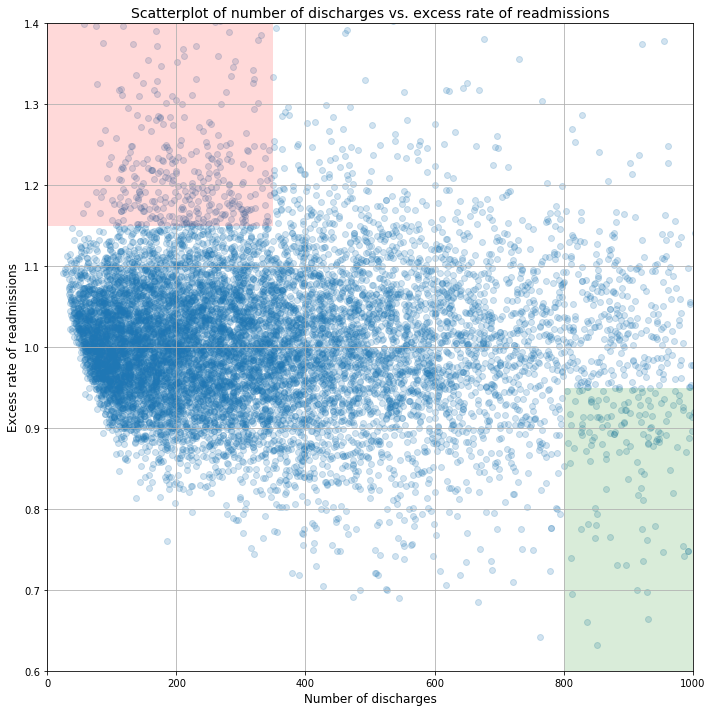

In [58]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 1000])
ax.set_ylim([.6, 1.4])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()